# PROJECT 4
# BY - RAM K

1. Import required libraries and read the dataset.

In [1]:
# Import required libraries and read the dataset

In [2]:
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [3]:
df=pd.read_csv('honeyproduction.csv')
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
# Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [11]:
df.shape

(626, 8)

In [12]:
df.sample(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
186,KY,5000.0,54,270000.0,78000.0,1.63,440000.0,2002
303,AZ,36000.0,50,1800000.0,720000.0,1.04,1872000.0,2005


In [13]:
df.describe(include='all')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


3. Display the percentage distribution of the data in each year using the pie chart.

In [14]:
# Display the percentage distribution of the data in each year using the pie chart.

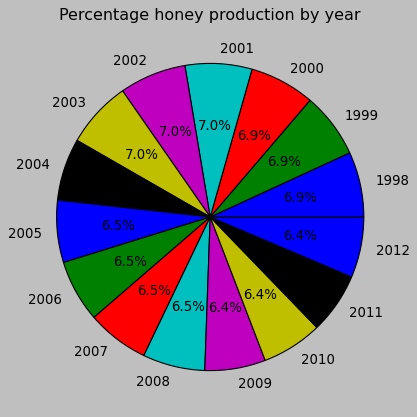

In [15]:
year_counts= df.groupby('year').size()
year_percents= year_counts/year_counts.sum()*100
plt.pie(year_percents,labels= year_percents.index,autopct= "%1.1f%%")
plt.title("Percentage honey production by year")
plt.show()

4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

In [16]:
# Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


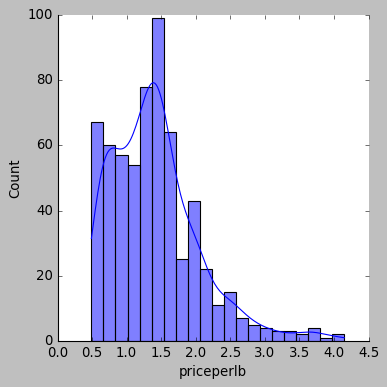

In [17]:
sns.displot(data= df, x= 'priceperlb',kde=True)

5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

In [18]:
# Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

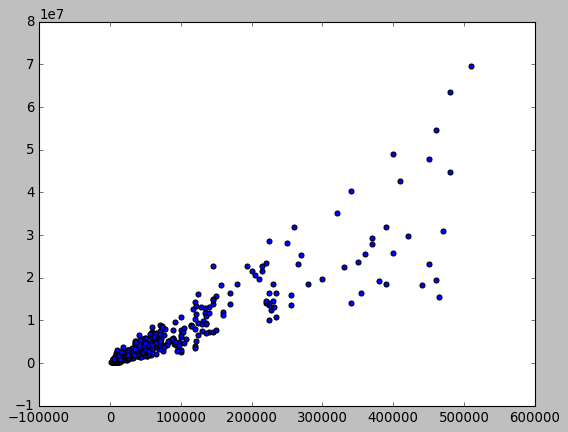

In [19]:
plt.scatter(df['numcol'],df['prodvalue'])
plt.show()

6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings

In [20]:
#  Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

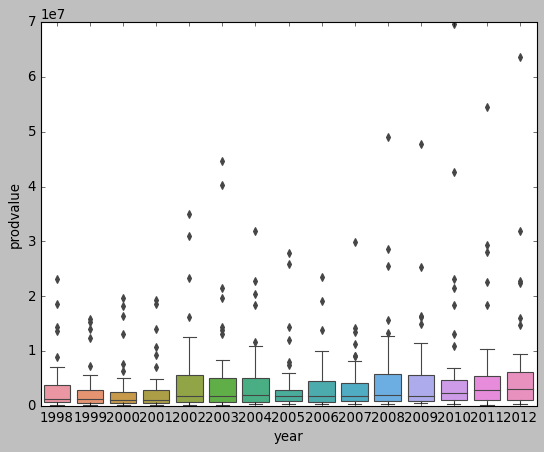

In [21]:
sns.boxplot(data=df, x= 'year', y='prodvalue')
plt.show()

 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

In [22]:
# Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

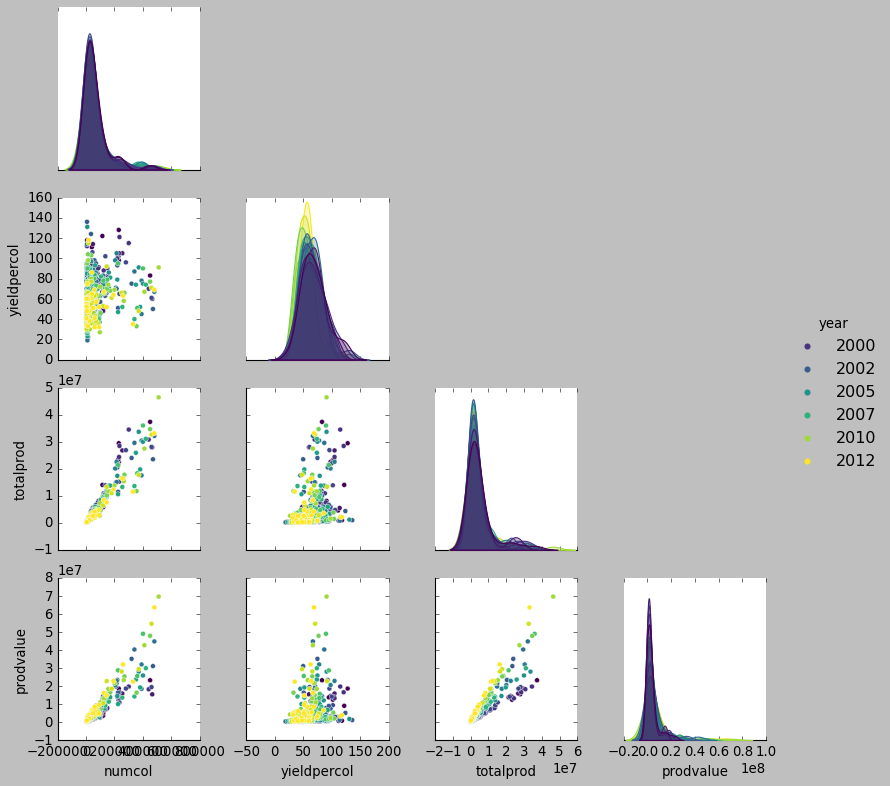

In [23]:
cols= ['numcol','yieldpercol','totalprod','prodvalue','year']
sns.pairplot(data=df[cols],hue="year",palette='viridis',corner=True)

8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

In [24]:
# Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

<Axes: >

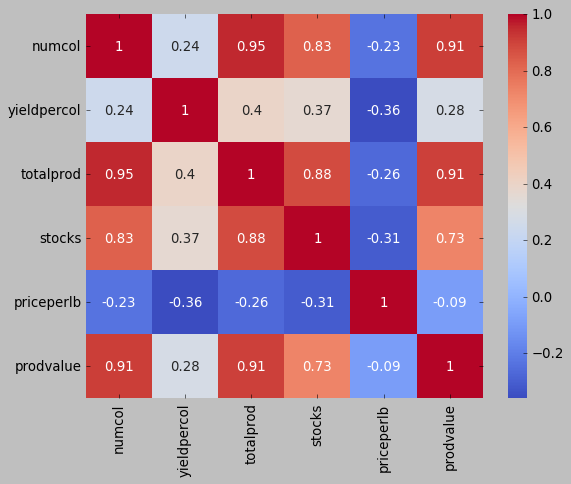

In [25]:
cols= ['numcol', 'yieldpercol','totalprod', 'stocks', 'priceperlb', 'prodvalue']
corr_= df[cols].corr()
sns.heatmap(corr_,annot=True,cmap='coolwarm')